# Chap1. Titanic tutorial
## 1. Check Dataset
- 1.1 Null data check
- 1.2 Target Label check

## 2. EDA(Explaratory Data Analysis)
- 2.1 Pclass
- 2.2 Sex
- 2.3 Both Sex and Pclass
- 2.4 Age
- 2.5 Pclass, Sex, Age
- 2.6 Embarked
- 2.7 Family - SibSP(형제, 자매) + Parch(부모, 자녀)
- 2.8 Cabin

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 튜토리얼 필자가 항상 쓰는 방법.
plt.style.use('seaborn') # matplotlib의 기본 스키마 말고, 시본 scheme을 세팅,
sns.set(font_scale=2.5) # graph 폰트사이즈를 일일이 지정할 필요 없이 seaborn에서 일괄세팅

# missingno를 어떻게 차리하려나?
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 무슨 뜻일까?
%matplotlib inline

C:\Users\jhuyk\AppData\Local\Temp\ipykernel_16480\726803923.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # matplotlib의 기본 스키마 말고, 시본 scheme을 세팅,


In [2]:
## 1. Read Dataset
df_train = pd.read_csv('./0703 Titianic/train.csv')
df_test = pd.read_csv('./0703 Titianic/test.csv')

In [3]:
# Check Dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explanation of Variables
1. survival : 생존 여부 / target label(1, 0 /int) 
2. Pclass : 티켓의 클래스 / 1 = 1st, 2= 2nd, 3 = 3rd, categorical feature, int
3. sex : 성별 / (male, female), str
4. Age : 나이 / continuous, int
5. sibSp : 형제 자매 / quantitiative, int
6. parch : 부모 /  quantitative, int
7. ticket : 티켓 번호 / alphabat + int, str
8. fare : 탑승료 / continous, float
9. cabin : 승객 번호 / alpha + int, str
10. embarked : 탑승 항구 / (C, Q, S), str


In [4]:
# 사실 위와 같은 데이터는 describe() 메소드로 확인할 수 있다.
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
## 1. 1 Null data check
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


## Cabin과 Age가 굉장히 많은 비율로 null값을 함유하고 있음.

In [18]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

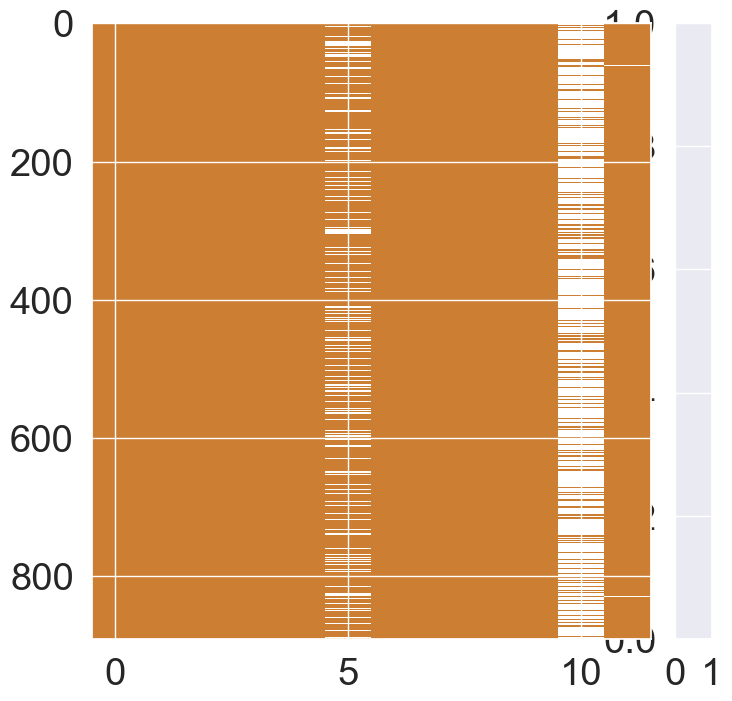

In [6]:
# 마찬가지로 Cabin과 Age가 굉장히 많은 비율의 NaN(null) value를 갖고 있었음
import missingno as msno
# msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))
# msno.fig, msno.ax = plt.subplots()
# msno.ax.grid(b=True, which='major', color='darkgray', linestyle='-')

# 에러가 나긴 하는데, 중요하진 않나....?
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

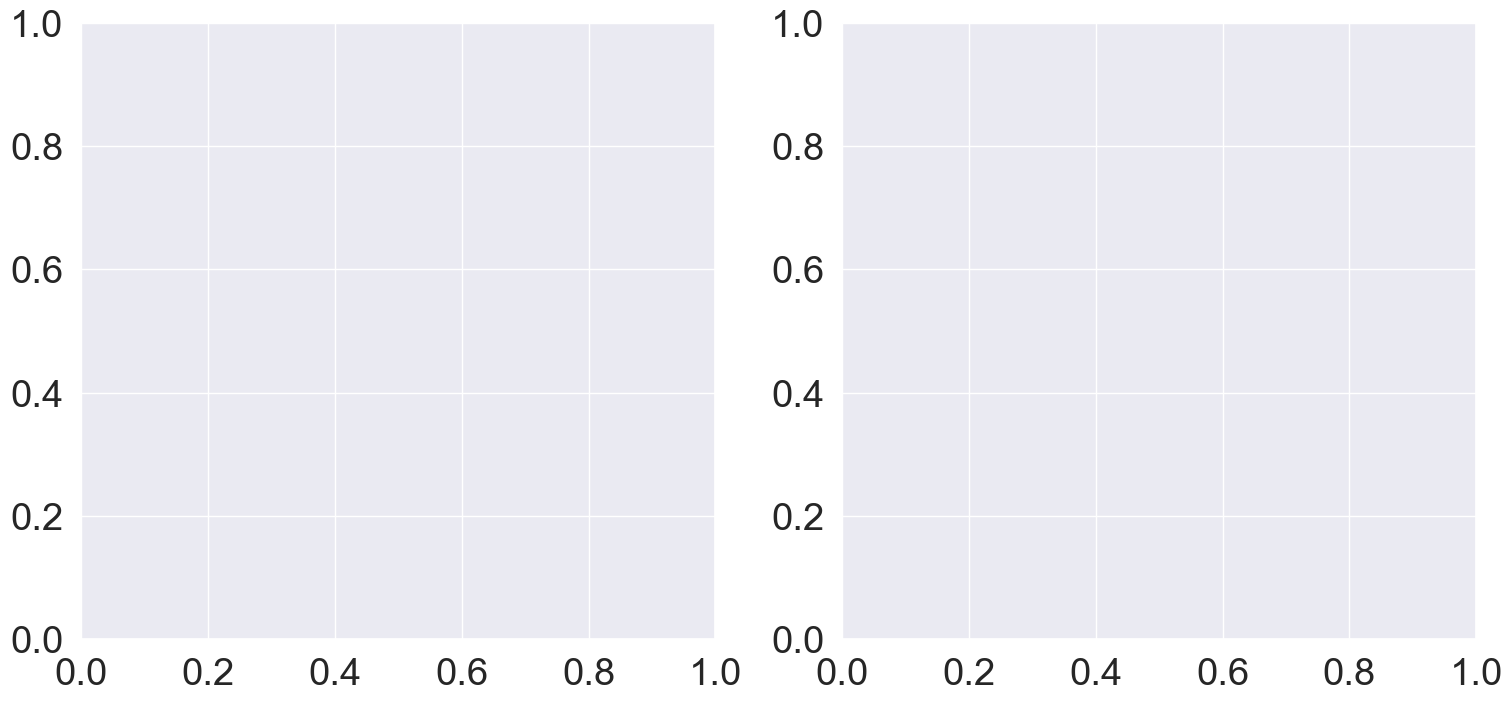

In [10]:
# 위 에러는 조금 이따 다시 알아보자.

## 1.2 Target Label Check

# <Figure size 1800 x 800 with 1 x 2 Axes
# ax : array([<Axes: >, <Axes: > ], dtype=object)


# 즉, f가 의미하는건 figure size
## ax가 의미하는건 축을 의미하는것 같은데, 지금은 subplot을 통해 1 x 2 size로 나뉘어진 형태
## ax[0] = (0, 0), ax[1] = (0, 1) 두 개가 존재하는것처럼 보임
f, ax = plt.subplots(1, 2, figsize=(18, 8))

In [11]:
# df_train의 Survived 컬럼을 밸류에 따라 pie plot을 찍으려고 한다.
# 각각의 속성을 알아보자.
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# ax[0] 에는 파이차트로 표현하고
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot-Survived')
ax[0].set_ylabel('')

plt.show()

# ax[1]에는 카운트플롯 차트로 표현하려 한다는 것 같다.
# 근데 여기 설정 안해도, 파이차트는 표현되어야하는거 아닌가?
# sns.countplot
# plt.show()

TypeError: catplot() got multiple values for argument 'data'

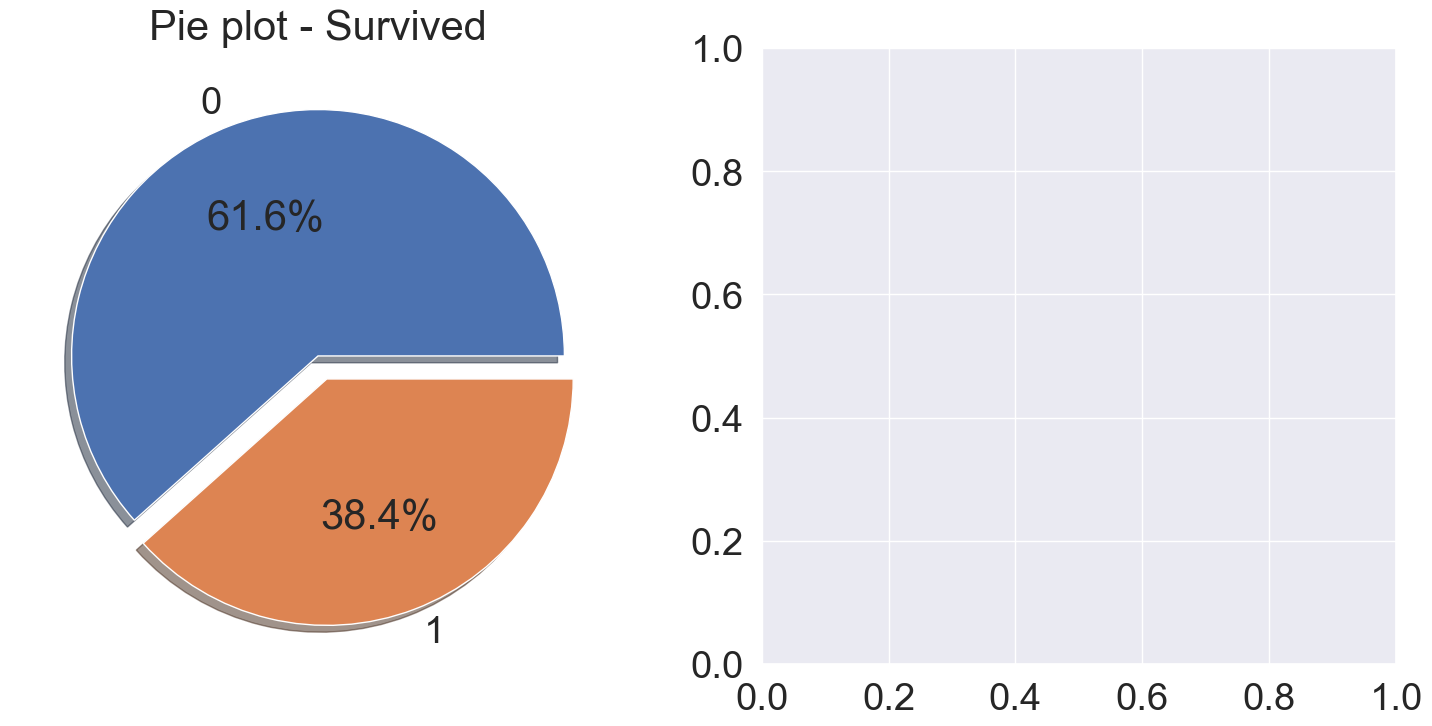

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.catplot('Survived', data=df_train, ax=ax[1], kind='count')
ax[1].set_title('Count plot - Survived')

plt.show()